## Logistic Regression
- use data from this link https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer(as_frame=True)
cancer_x = cancer.data
cancer_y = cancer.target

In [3]:
cancer_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#standardize the data
cancer_x_norm = StandardScaler().fit_transform(cancer_x)

#train_test_split, cancer_y consistant of 0, 1, so no need to standardize
X_train, X_test, Y_train, Y_test = train_test_split(cancer_x_norm, cancer_y, test_size = 0.2, random_state = 3)


In [7]:
#Need to run a Recursive Feature Elimination Process to see which features we should select to model
#LogisticRegression uses 0.5 probability as default to convert probability into classification

rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 4, verbose = 1); #select 4 features to model

#fit the model
logr = rfe.fit(X_train, Y_train);

#print the features and their ranking (high = dropped early)
print(dict(zip(cancer_x.columns, rfe.ranking_)));

#calcualte the test set accuracy
accuracy = accuracy_score(Y_test, rfe.predict(X_test)) *100
print('%.2f%% accuracy on test set'%accuracy)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
{'mean radius': 10, 'mean texture': 17, 'mean perimeter': 14, 'mean a

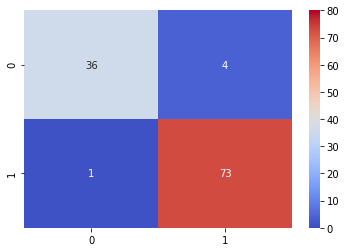

From the training set confusion matrix, we know the following: 
 True Negative: 36 
 False Positive: 4 
 False Negative: 1 
 True Positive: 73

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.95      0.99      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#generate confusion matrix
sns.heatmap(confusion_matrix(Y_test,rfe.predict(X_test)), annot= True,cmap = 'coolwarm',
            cbar_kws={'ticks': np.arange(0,90,10)},
            vmin=0, vmax=80)
plt.show()


tn_test, fp_test, fn_test, tp_test = confusion_matrix(Y_test,rfe.predict(X_test)).ravel()
print("From the training set confusion matrix, we know the following: \n True Negative: {} \n False Positive: {} \n False Negative: {} \n True Positive: {}\n"
          .format(tn_test, fp_test, fn_test, tp_test))


#get the classification report, y_true, y_predict
report = (classification_report(Y_test,rfe.predict(X_test)))

print(report)

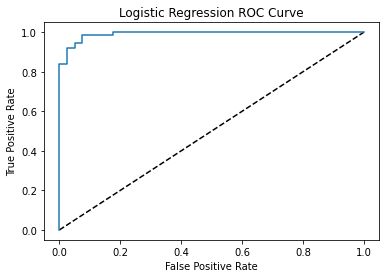

The area under ROC curve (predicted probability) is 99.12%


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


##graph ROC graph- checking this allows you to tell whether logistic regression is a good approach
y_pred_prob = logr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--') #this is when true positive = false positive

plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve') 
plt.show();


#the predicted probabiity
roc_auc_score = roc_auc_score(Y_test, y_pred_prob) *100

print("The area under ROC curve (predicted probability) is %.2f%%" %roc_auc_score)